# Unsupervised Learning –Clustering
    1) K-means,K-means++
    2) Hierarchical Method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


## Genearte sample data and visualiztion

In [10]:
n1=5
n2=5
# cluster 
x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5,n1)
C1=np.array(list(zip(x1,y1)))
# cluster 
x2 = np.random.normal(30,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[59.60048558  4.87551271]
[28.08112423  4.8579956 ]


In [11]:
X_train 

array([[57.236335  ,  5.1604347 ],
       [65.73693001,  4.95569032],
       [82.21778624,  4.02959435],
       [39.47666147,  4.91433008],
       [53.3347152 ,  5.31751412],
       [26.73590588,  5.04693176],
       [40.50997656,  4.93272193],
       [25.20303615,  5.48989709],
       [10.12599031,  4.30684535],
       [37.83071223,  4.51358188]])

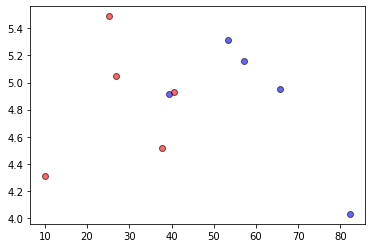

In [12]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [13]:
X_train

array([[57.236335  ,  5.1604347 ],
       [65.73693001,  4.95569032],
       [82.21778624,  4.02959435],
       [39.47666147,  4.91433008],
       [53.3347152 ,  5.31751412],
       [26.73590588,  5.04693176],
       [40.50997656,  4.93272193],
       [25.20303615,  5.48989709],
       [10.12599031,  4.30684535],
       [37.83071223,  4.51358188]])

In [14]:
X_train.shape

(10, 2)

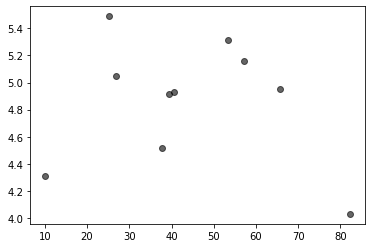

In [15]:
plot_scatter(X_train)
plt.show()

In [16]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [43.8408049   4.86675416]
std: [20.16110525  0.43171678]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [17]:
kmeans = KMeans(init='random',n_clusters=2).fit(X_train)
kmeans

KMeans(init='random', n_clusters=2)

In [18]:
kmeans.predict([[80, 0], [100, 3]])

array([1, 1], dtype=int32)

In [19]:
kmeans.predict([[28, 5]])

array([0], dtype=int32)

In [20]:
kmeans.predict(X_train)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [21]:
kmeans.cluster_centers_

array([[29.98038043,  4.86738468],
       [64.63144161,  4.86580837]])

In [22]:
X_train

array([[57.236335  ,  5.1604347 ],
       [65.73693001,  4.95569032],
       [82.21778624,  4.02959435],
       [39.47666147,  4.91433008],
       [53.3347152 ,  5.31751412],
       [26.73590588,  5.04693176],
       [40.50997656,  4.93272193],
       [25.20303615,  5.48989709],
       [10.12599031,  4.30684535],
       [37.83071223,  4.51358188]])

In [23]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [24]:
kmeans.predict(X_train)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

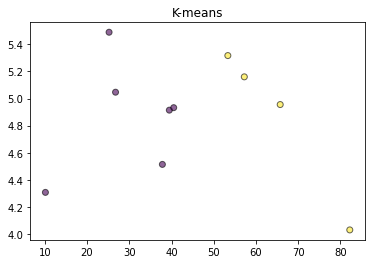

In [25]:
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [26]:
kmeans.cluster_centers_

array([[29.98038043,  4.86738468],
       [64.63144161,  4.86580837]])

In [27]:
kmeans.cluster_centers_[:,1]

array([4.86738468, 4.86580837])

In [28]:
kmeans.predict(X_train)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

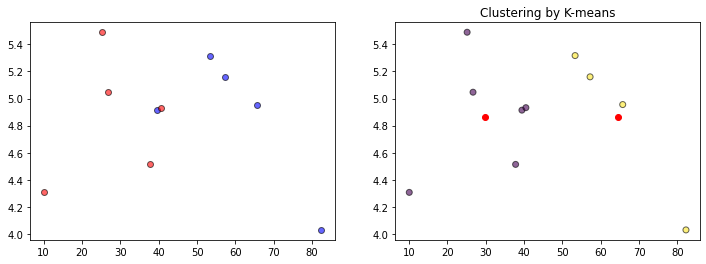

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')
plt.title("Clustering by K-means")
plt.show()


## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [30]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [31]:
acv = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [32]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

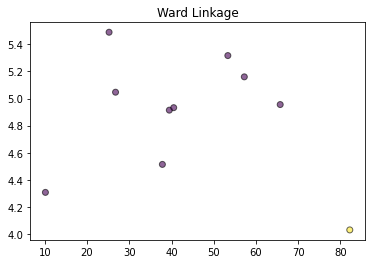

In [33]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Ward Linkage")
plt.show()

In [34]:
X_train

array([[57.236335  ,  5.1604347 ],
       [65.73693001,  4.95569032],
       [82.21778624,  4.02959435],
       [39.47666147,  4.91433008],
       [53.3347152 ,  5.31751412],
       [26.73590588,  5.04693176],
       [40.50997656,  4.93272193],
       [25.20303615,  5.48989709],
       [10.12599031,  4.30684535],
       [37.83071223,  4.51358188]])

## distance matrix

In [35]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles,make_blobs
D = np.round(pairwise_distances(X_train),1) 
D

array([[ 0. ,  8.5, 25. , 17.8,  3.9, 30.5, 16.7, 32. , 47.1, 19.4],
       [ 8.5,  0. , 16.5, 26.3, 12.4, 39. , 25.2, 40.5, 55.6, 27.9],
       [25. , 16.5,  0. , 42.8, 28.9, 55.5, 41.7, 57. , 72.1, 44.4],
       [17.8, 26.3, 42.8,  0. , 13.9, 12.7,  1. , 14.3, 29.4,  1.7],
       [ 3.9, 12.4, 28.9, 13.9,  0. , 26.6, 12.8, 28.1, 43.2, 15.5],
       [30.5, 39. , 55.5, 12.7, 26.6,  0. , 13.8,  1.6, 16.6, 11.1],
       [16.7, 25.2, 41.7,  1. , 12.8, 13.8,  0. , 15.3, 30.4,  2.7],
       [32. , 40.5, 57. , 14.3, 28.1,  1.6, 15.3,  0. , 15.1, 12.7],
       [47.1, 55.6, 72.1, 29.4, 43.2, 16.6, 30.4, 15.1,  0. , 27.7],
       [19.4, 27.9, 44.4,  1.7, 15.5, 11.1,  2.7, 12.7, 27.7,  0. ]])

In [36]:
D.shape[0]

10

In [37]:
def min_dist(D):
    minimum=10000  
    min_x=0
    min_y=0
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j]<minimum:         
                minimum=D[i][j]
                min_x=i
                min_y=j
                #print(i,j,D[i][j])
                
    return (min_x,min_y),minimum

In [38]:
min_dist(D)

((6, 3), 1.0)

## plot dendrogram (樹狀圖)

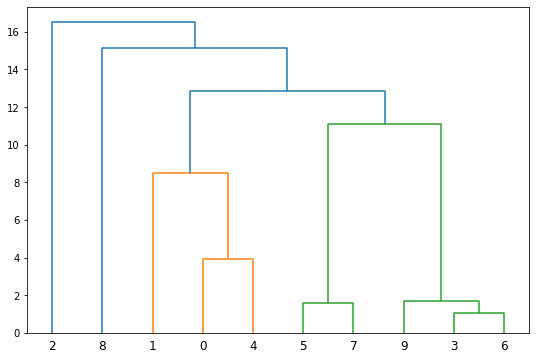

In [39]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()

## Comparing different hierarchical linkage methods

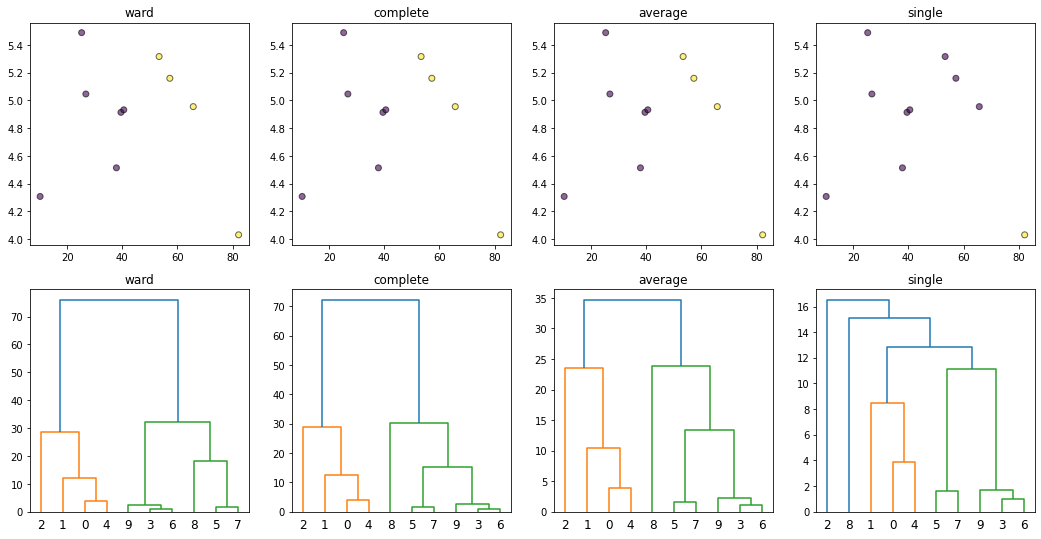

In [40]:

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)   
        #plot scatter 
        plt.subplot(2,4,i+1)        
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)        
        plot_dendrogram(X,link)
        plt.title(link)   

    plt.show()     
    
compare_linkage(X_train)

## Apply K-means with re-scaled data
### Feature Re-scale 

In [41]:
X_train

array([[57.236335  ,  5.1604347 ],
       [65.73693001,  4.95569032],
       [82.21778624,  4.02959435],
       [39.47666147,  4.91433008],
       [53.3347152 ,  5.31751412],
       [26.73590588,  5.04693176],
       [40.50997656,  4.93272193],
       [25.20303615,  5.48989709],
       [10.12599031,  4.30684535],
       [37.83071223,  4.51358188]])

[43.8408049   4.86675416]
[20.16110525  0.43171678]


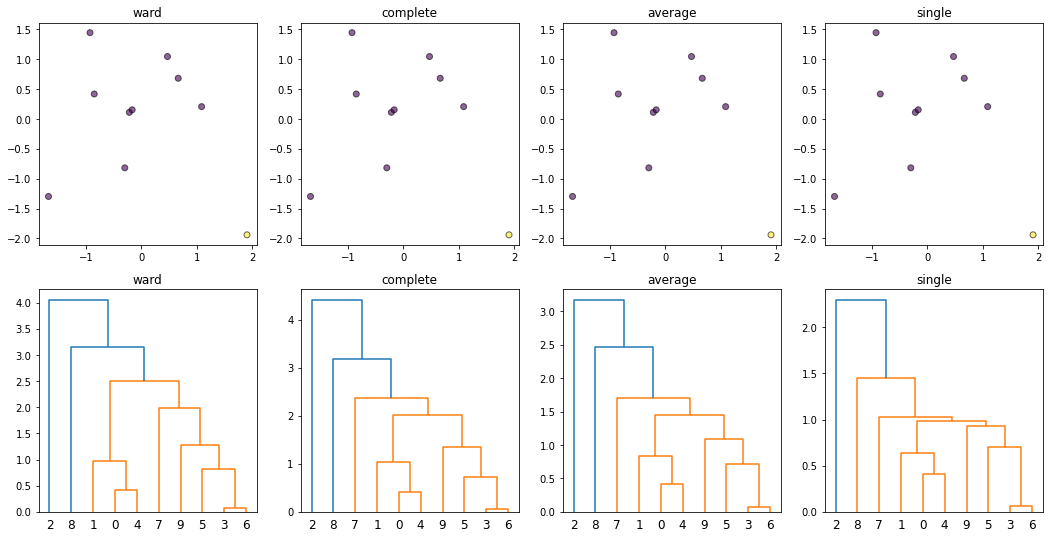

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

#transform: (x-u)/std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std,axis=0),2)

compare_linkage(X_train_std)

In [43]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

In [44]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


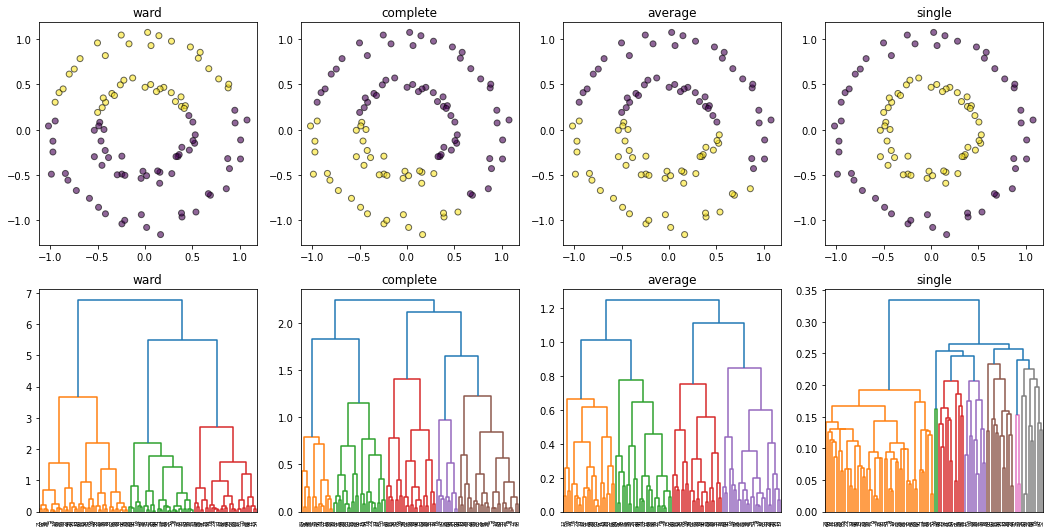

In [46]:
compare_linkage(X)